In [ ]:
# !pip install tensorflowjs

In [ ]:
!pip install tensorflow_io

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 58.5 MB/s eta 0:00:00


In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 12.4 MB/s eta 0:00:00


In [ ]:
import os
import pathlib
import zipfile

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import tensorflow_io as tfio

from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display

# seed = 42
# tf.random.set_seed(seed)
# np.random.seed(seed)

In [ ]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')
zip_ref = zipfile.ZipFile("/content/drive/My Drive/Bangkit Datasets/data_babies_cry3.zip", 'r')
zip_ref.extractall()
zip_ref.close()

Mounted at /content/drive/


## File Examples

In [ ]:
BURP_FILE = os.path.join('data_babies_cry','burp','bu-16.wav')

In [ ]:
BURP_FILE

'data_babies_cry/burp/bu-16.wav'

## Process the .wav file

In [ ]:
def load_wav_16k(f):
  file_contents = tf.io.read_file(f)
  wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
  wav = tf.squeeze(wav, axis=-1)
  sample_rate = tf.cast(sample_rate, dtype=tf.int64)
  wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
  return wav

In [ ]:
t_wav = load_wav_16k(BURP_FILE)

In [ ]:
t_wav

<tf.Tensor: shape=(110400,), dtype=float32, numpy=
array([0.        , 0.        , 0.        , ..., 0.09723914, 0.13281108,
       0.13774772], dtype=float32)>

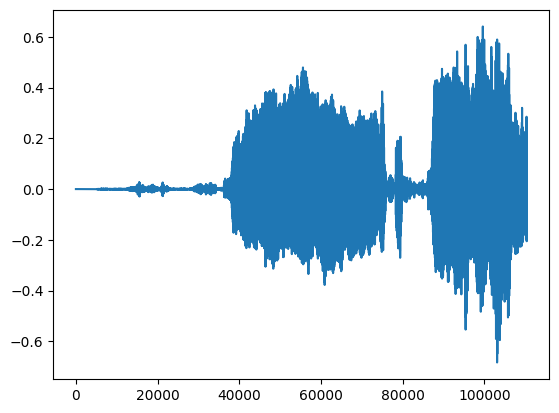

In [ ]:
plt.plot(t_wav)
plt.show()

## Process the Dataset

In [ ]:
BP = os.path.join('data_babies_cry','belly-pain')
BU = os.path.join('data_babies_cry','burp')
DI = os.path.join('data_babies_cry','discomfort')
HU = os.path.join('data_babies_cry','hungry')
LO = os.path.join('data_babies_cry','lonely')
SC = os.path.join('data_babies_cry','scared')
TE = os.path.join('data_babies_cry','temperature')
TI = os.path.join('data_babies_cry','tired')

In [ ]:
bp = tf.data.Dataset.list_files(BP+'/*.wav')
bu = tf.data.Dataset.list_files(BU+'/*.wav')
di = tf.data.Dataset.list_files(DI+'/*.wav')
hu = tf.data.Dataset.list_files(HU+'/*.wav')
lo = tf.data.Dataset.list_files(LO+'/*.wav')
sc = tf.data.Dataset.list_files(SC+'/*.wav')
te = tf.data.Dataset.list_files(TE+'/*.wav')
ti = tf.data.Dataset.list_files(TI+'/*.wav')

In [ ]:
bp.as_numpy_iterator().next()

b'data_babies_cry/belly-pain/bp-21.wav'

In [ ]:
belly_pain = tf.data.Dataset.zip((bp, tf.data.Dataset.from_tensor_slices(tf.zeros(len(bp)))))
burp = tf.data.Dataset.zip((bu, tf.data.Dataset.from_tensor_slices(tf.ones(len(bu)))))
discomfort = tf.data.Dataset.zip((di, tf.data.Dataset.from_tensor_slices(tf.fill(len(bu), value=2.0))))
hungry = tf.data.Dataset.zip((hu, tf.data.Dataset.from_tensor_slices(tf.fill(len(hu), value=3.0))))
lonely = tf.data.Dataset.zip((lo, tf.data.Dataset.from_tensor_slices(tf.fill(len(lo), value=4.0))))
scared = tf.data.Dataset.zip((sc, tf.data.Dataset.from_tensor_slices(tf.fill(len(sc), value=5.0))))
temperature = tf.data.Dataset.zip((te, tf.data.Dataset.from_tensor_slices(tf.fill(len(te), value=6.0))))
tired = tf.data.Dataset.zip((ti, tf.data.Dataset.from_tensor_slices(tf.fill(len(ti), value=7.0))))

In [ ]:
data = belly_pain.concatenate(burp)\
  .concatenate(discomfort)\
  .concatenate(hungry)\
  .concatenate(lonely)\
  .concatenate(scared)\
  .concatenate(temperature)\
  .concatenate(tired)

In [ ]:
data.shuffle(1000).as_numpy_iterator().next()

(b'data_babies_cry/tired/ti-6.wav', 7.0)

## Average length of .wav files

In [ ]:
len(os.listdir(os.path.join('data_babies_cry', 'burp')))

45

In [ ]:
lengths = []

for file in os.listdir(os.path.join('data_babies_cry', 'tired')):
  print(os.path.join('data_babies_cry', 'tired', file))
  tw = load_wav_16k(os.path.join('data_babies_cry', 'tired', file))
  lengths.append(len(tw))

data_babies_cry/tired/7A22229D-06C2-4AAA-9674-DE5DF1906B3A-1436891944-1.1-m-72-ti.wav
data_babies_cry/tired/d5abedab-9ed5-48d0-a83b-fc00c33d6d6b-1430079192907-1.7-f-04-ti.wav
data_babies_cry/tired/ca7d8d54-13cb-4060-8db4-90651b60c078-1434674792223-1.7-f-26-ti.wav


data_babies_cry/tired/B2AABCE0-1F62-4B57-B58A-308959ABDFE7-1437188751-1.1-m-26-ti.wav
data_babies_cry/tired/D4665929-8695-4655-927F-63F09B2D4CB8-1430726940-1.0-f-26-ti.wav
data_babies_cry/tired/1309B82C-F146-46F0-A723-45345AFA6EA8-1430059864-1.0-f-04-ti.wav
data_babies_cry/tired/ti-19.wav
data_babies_cry/tired/ti-6 - Copy.wav
data_babies_cry/tired/InShot_20230519_205849613.wav
data_babies_cry/tired/C421C6FE-DFEE-4080-8AEA-848E7CE4756B-1430548384-1.0-m-26-ti.wav
data_babies_cry/tired/ti-40.wav
data_babies_cry/tired/cecd525b-18fd-49e3-b2b9-dfb08b93ad95-1430110001954-1.7-m-26-ti.wav
data_babies_cry/tired/cecd525b-18fd-49e3-b2b9-dfb08b93ad95-1430110029205-1.7-m-26-ti.wav
data_babies_cry/tired/InShot_20230519_205317124.wav
data_babies_cry/tired/d6cda191-4962-4308-9a36-46d5648a95ed-1431587899682-1.7-m-04-ti.wav
data_babies_cry/tired/ti-6.wav
data_babies_cry/tired/InShot_20230519_205248517.wav
data_babies_cry/tired/ti-3.wav
data_babies_cry/tired/C5127741-5897-468C-A543-7F1B72569F0E-1428333964

In [ ]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=90180>

In [ ]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=53280>

In [ ]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=112000>

In [ ]:
(111172+108616+92348+82168+90127+82021+99504+90180)/8

94517.0

## Preprocess and Spectogram

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
def preprocess(file_path, label):
  wav = load_wav_16k(file_path)
  wav = wav[:70000]
  zero_padding = tf.zeros([70000] - tf.shape(wav), dtype=tf.float32)
  wav = tf.concat([zero_padding, wav], 0)
  spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
  spectrogram = tf.abs(spectrogram)
  spectrogram = tf.expand_dims(spectrogram, axis=2)
  label = tf.cast(label, dtype=tf.int32)  # Convert label to int32
  label = tf.one_hot(label, depth=8)
  return spectrogram, label

In [ ]:
sp, l = preprocess('/content/data_babies_cry/lonely/3f61124d-d02c-47dd-a009-44e97e60c4ca-1430761203697-1.7-f-72-lo.wav', 4)

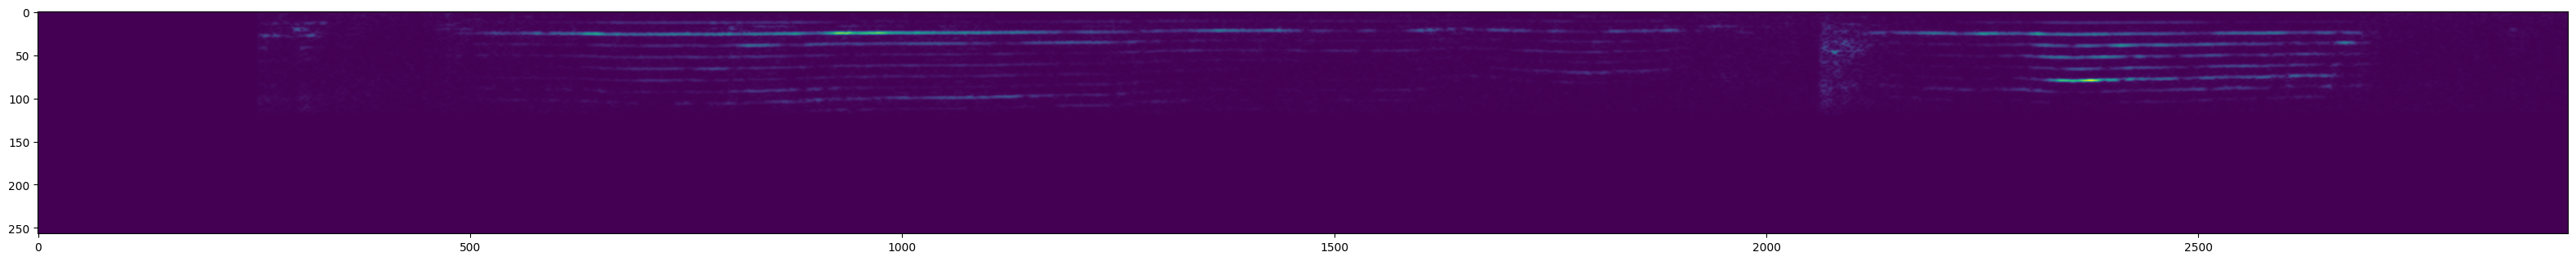

In [ ]:
plt.figure(figsize=(40,20))
plt.imshow(tf.transpose(sp)[0])
plt.show()

## Build Model

In [ ]:
data = data.map(preprocess).cache().shuffle(buffer_size=1000).batch(16).prefetch(8)

In [ ]:
len(data)*.8

18.400000000000002

In [ ]:
len(data)

23

In [ ]:
train = data.take(18)
val = data.skip(18).take(3)
test = data.skip(21).take(2)

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=(None, 8), dtype=tf.float32, name=None))>

In [ ]:
samples, labels = train.as_numpy_iterator().next()
print(labels.shape)
samples.shape

(16, 8)


(16, 2178, 257, 1)

In [ ]:
s, l = val.as_numpy_iterator().next()
print(l.shape)
s.shape

(16, 8)


(16, 2928, 257, 1)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(2178, 257, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=8, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 2176, 255, 16)     160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1088, 127, 16)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 1086, 125, 16)     2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 543, 62, 16)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 541, 60, 16)       2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 270, 30, 16)      0

In [ ]:
import visualkeras
dot_img_file = './model_1.png'
visualkeras.layered_view(model, legend=True,to_file = dot_img_file).show()

In [ ]:
hist = model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
18/18 [==============================] - 29s 160ms/step - loss: 2.9353 - accuracy: 0.1979 - precision: 0.2857 - recall: 0.0694 - val_loss: 1.8094 - val_accuracy: 0.4375 - val_precision: 1.0000 - val_recall: 0.0208
Epoch 2/10
18/18 [==============================] - 2s 132ms/step - loss: 1.6287 - accuracy: 0.4792 - precision: 0.8621 - recall: 0.1736 - val_loss: 1.1251 - val_accuracy: 0.6042 - val_precision: 0.8800 - val_recall: 0.4583
Epoch 3/10
18/18 [==============================] - 2s 128ms/step - loss: 1.0500 - accuracy: 0.6840 - precision: 0.9459 - recall: 0.4861 - val_loss: 0.7785 - val_accuracy: 0.8333 - val_precision: 0.9667 - val_recall: 0.6042
Epoch 4/10
18/18 [==============================] - 2s 114ms/step - loss: 0.7326 - accuracy: 0.7812 - precision: 0.9409 - recall: 0.6076 - val_loss: 0.4730 - val_accuracy: 0.8542 - val_precision: 0.9474 - val_recall: 0.7500
Epoch 5/10
18/18 [==============================] - 2s 118ms/step - loss: 0.5152 - accuracy: 0.8403 - p

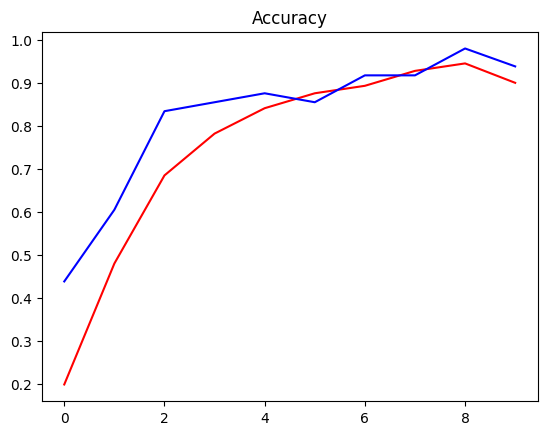

In [ ]:
plt.title('Accuracy')
plt.plot(hist.history['accuracy'], 'r')
plt.plot(hist.history['val_accuracy'], 'b')
plt.show()

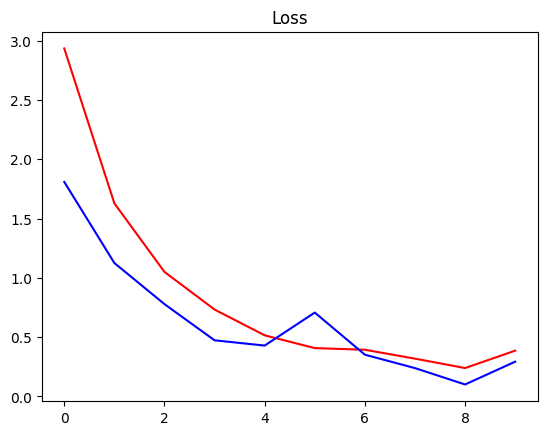

In [ ]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

## Testing


In [ ]:
x_test, y_test = test.as_numpy_iterator().next()

In [ ]:
yhat = model.predict(x_test)

1/1 [==============================] - 0s 140ms/step


In [ ]:
res = [np.argmax(x) for x in yhat]

In [ ]:
res

[7, 5, 5, 5, 0, 1, 5, 4, 6, 3, 1, 0, 0, 6, 4, 7]

In [ ]:
test_result = model.evaluate(test, verbose=2)
test_accuracy = test_result[1]  # Access the accuracy value
print("Test Accuracy:", test_accuracy)


2/2 - 1s - loss: 0.4877 - accuracy: 0.8696 - precision: 0.9000 - recall: 0.7826 - 746ms/epoch - 373ms/step
Test Accuracy: 0.8695651888847351


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have the ground truth labels and predicted labels stored in numpy arrays
y_true = np.array(y_test)  # Ground truth labels
y_pred = np.array(res)  # Predicted labels

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

print(cm)

In [ ]:
saved_model_path = './temp_model.h5'
model.save(saved_model_path)

In [ ]:
!tensorflowjs_converter --input_format=keras {saved_model_path} ./

2023-05-29 07:32:06.996487: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Test Single File

In [ ]:
test_hung_new = preprocess(BURP_FILE,0)
# test_hung_new[0].numpy()
test_hung_new[0].numpy().shape

(2178, 257, 1)

In [ ]:
expd = tf.expand_dims(test_hung_new[0].numpy(), axis=0)
# expd

In [ ]:
yt_new = model.predict(expd)
np.argmax(yt_new)

1/1 [==============================] - 0s 178ms/step


1

In [ ]:
yt_new

array([[3.1121217e-05, 9.9324036e-01, 1.3468215e-04, 1.1225043e-06,
        2.5356396e-05, 5.2834875e-03, 8.9863490e-05, 1.1939487e-03]],
      dtype=float32)